In [13]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from qlearning import QLearning
env = gym.make('FrozenLake-v0')
model = QLearning(env, lr=0.01, dr=0.99, explr_decay=0.001, min_explr_rate=0.01)
model.learning_settings(100000, 1000)
model.train()

print("Q Table: ", model.q_table)

Q Table:  [[0.51911205 0.39034274 0.36629159 0.36478328]
 [0.00747764 0.01390755 0.11012007 0.01912761]
 [0.0267943  0.02433617 0.25750526 0.0188806 ]
 [0.01767662 0.0181527  0.01674977 0.25034868]
 [0.5329974  0.38611257 0.3209699  0.32583362]
 [0.         0.         0.         0.        ]
 [0.0939284  0.14114339 0.28210843 0.02410578]
 [0.         0.         0.         0.        ]
 [0.36756221 0.40035571 0.3744849  0.56156565]
 [0.42337219 0.61355485 0.43043832 0.38804586]
 [0.56129849 0.4334519  0.34840477 0.27454551]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.42107914 0.53817465 0.72090004 0.4697647 ]
 [0.66976973 0.85768615 0.77814461 0.72485502]
 [0.         0.         0.         0.        ]]


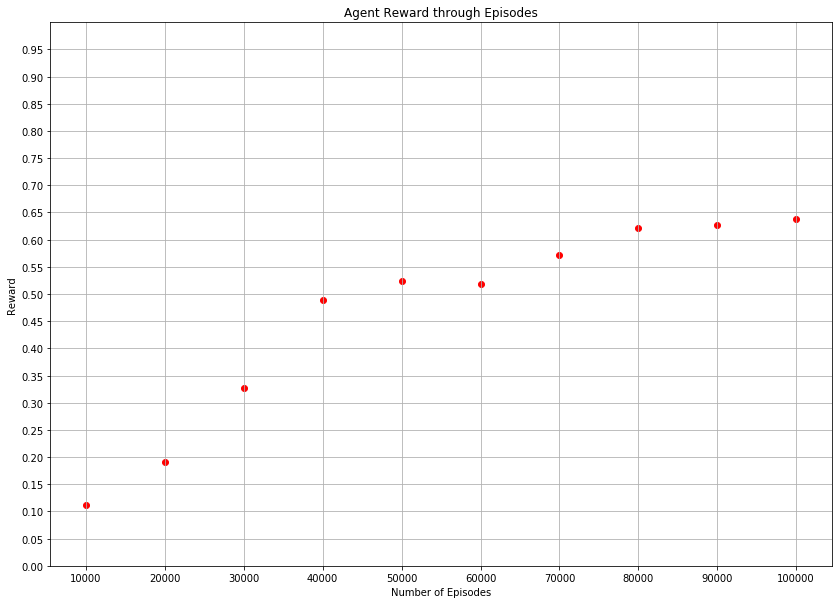

In [14]:
batch_size = 10000
episode_sequence = np.arange(batch_size, model.num_episodes+1, batch_size)
rewards_th = np.split(np.array(model.episodes_rewards), model.num_episodes/batch_size)
rewards = []
for r in rewards_th:
    rewards.append(np.sum(r/batch_size))
plt.figure(figsize=(14,10))
plt.scatter(episode_sequence, rewards, color='red')
plt.grid(True)
plt.xlabel('Number of Episodes')
plt.ylabel('Reward')
plt.xticks(episode_sequence)
plt.yticks(np.arange(0, 1, 0.05))
plt.ylim(0.0, 1.0)
plt.title('Agent Reward through Episodes')
plt.show()

In [15]:
runs = 10000
res = 0
for _ in range(runs):
    res += model.run(render=False)
accuracy = res/runs*100
print('The Goal was reached ' + str(res) + ' times over ' + str(runs) + ' runs. ' + '{:.3f}'.format(accuracy) + ' %')




The Goal was reached 7097 times over 10000 runs. 70.970 %
